In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame


In [8]:
#read from csv file 
df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:

X = df.drop(columns=['diagnosis','Unnamed: 32'],axis=1)
y = df.diagnosis

In [17]:
len(df)

569

In [18]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [41]:
col =list(df.columns)

In [42]:
col.remove('Unnamed: 32')
col.remove('diagnosis')
col

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

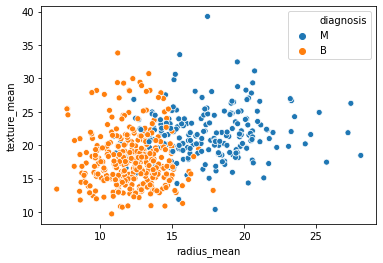

In [19]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=df,hue='diagnosis')

In [20]:
# random undersampling
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(random_state=33,ratio=1)
new_X, new_y = RUS.fit_resample(X, y)

In [23]:
pd.Series(new_y).value_counts()

B    212
M    212
dtype: int64

In [43]:
new_df = pd.DataFrame(new_X,columns=col)
new_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,901028.0,13.870,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,...,15.110,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113
1,917896.0,13.710,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,...,15.110,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
2,891670.0,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,...,13.740,19.93,88.81,585.4,0.1483,0.2068,0.22410,0.10560,0.3380,0.09584
3,921092.0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938
4,9112367.0,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.350,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788


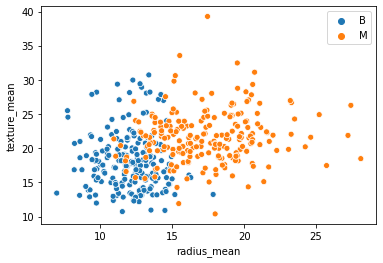

In [44]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=new_df,hue=new_y)